# Introdução a Aprendizado de Máquina

## Introdução

Utilizaremos a base de dados iris para esse tutorial. Essa é uma base de dados bastante conhecida contendo medidas das pétalas e sépalas da flor de íris. Os dados estão contidos em um arquivo chamado `Iris_Data.csv` encontrado no diretório [data](data).

In [13]:
import os
data_path = ['data']

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_rows', 15)

# The location of the data file
filepath="https://raw.githubusercontent.com/folivetti/AprendizadoMaquina/51e6445cfde7df213f9758d16bcfd9db94cc42dd/data/Iris_Data.csv"
#filepath='iris_data.csv'

# Import the data
data = pd.read_csv(filepath)

print(data)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
5             5.4          3.9           1.7          0.4     Iris-setosa
6             4.6          3.4           1.4          0.3     Iris-setosa
..            ...          ...           ...          ...             ...
143           6.8          3.2           5.9          2.3  Iris-virginica
144           6.7          3.3           5.7          2.5  Iris-virginica
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0        

## Exercício 1

Carregue os dados do arquivo usando as técnicas do tutorial *Introduction_to_Machine_Learning_and_Toolkit*. Examine o arquivo.

Indique o seguinte:

* O número de pontos (linhas) (*Dica:* verifique o atributo `.shape` do dataframe.)
* O nome das colunas. (*Dica:* verifique o atributo `.columns` do dataframe.)
* Os tipos associados a cada coluna. (*Dica:* verifique o atributo `.dtypes` do dataframe.)

In [14]:
#Rows and Cols
print('Rows: ', data.shape[0])
print()
print('Cols names:', data.columns,sep='\n')
print()
print('Cols types:', data.dtypes,sep='\n')

Rows:  150

Cols names:
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Cols types:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


## Exercício 2

Examine os nomes das espécies e note que todas elas começam com 'Iris-'. Remova essa parte do nome para tornar o nome mais curto. 

*Dica:* tem várias maneiras de fazer isso, você pode usar o [string processing methods](http://pandas.pydata.org/pandas-docs/stable/text.html) ou o [apply method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html), por exemplo.

In [15]:
#remove the prefix 'Iris-' from all species
data['species'] = data['species'].str.replace('Iris-','')

print(data)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
5             5.4          3.9           1.7          0.4     setosa
6             4.6          3.4           1.4          0.3     setosa
..            ...          ...           ...          ...        ...
143           6.8          3.2           5.9          2.3  virginica
144           6.7          3.3           5.7          2.5  virginica
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4    

## Exercício 3

Determine:
* A quantidade de cada espécie presente na base. (*Dica:* verifique o método `.value_counts` da série.)
* A média, mediana, quantis e faixas (máximo-mínimo) para cada medida de pétala e sépala.

*Dica:* para a última parte, o método `.describe` tem mediana, mas é chamada de *50%* quantile. `.describe` não tem faixa, portanto você precisará criar uma nova entrada na tabela com `max - min`.

In [26]:
print('COUNT')
print(pd.value_counts(data['species']), '\n')

print('STATS')
r = pd.DataFrame(columns=['mean','median','quantile','min','max'])
r['mean'] = data.mean()
r['median'] = data.median()
r['quantile'] = data.quantile()
r['min'] = data.min()
r['max'] = data.max()
print(r)
print()

print('DESCRIBE')
print(data.describe())

COUNT
virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64 

STATS
                  mean  median  quantile  min  max
sepal_length  5.843333    5.80      5.80  4.3  7.9
sepal_width   3.054000    3.00      3.00    2  4.4
petal_length  3.758667    4.35      4.35    1  6.9
petal_width   1.198667    1.30      1.30  0.1  2.5

DESCRIBE
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


## Exercício 4

Calcule **para cada espécie** em um dataframe separado:

* A média de cada medida (sepal_length, sepal_width, petal_length, e petal_width).
* A mediana dessas medidas.

*Dica:* você pode usar o método [`groupby`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) do Pandas para agrupar as espécies antes de calcular as estatísticas.

Se você terminar ambos os cálculos, tente calcular a média e mediana em uma única tabela (com uma única chamada de groupby). Veja a seção da documentação [applying multiple functions at once](http://pandas.pydata.org/pandas-docs/stable/groupby.html#applying-multiple-functions-at-once) para algumas dicas.

In [17]:
#mean and median by species
print(data.groupby('species').agg([np.mean, np.median]))

           sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0  


## Exercício 5

Faça um scatter plot de `sepal_length` vs `sepal_width` usando Matplotlib. Coloque um `label` nos eixos e dê um título ao gráfico.

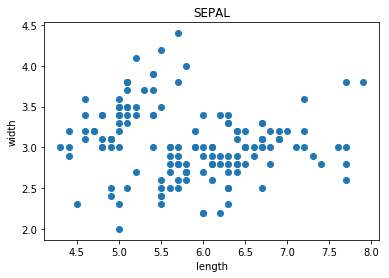

In [18]:
#scatter plot
plt.title("SEPAL")
plt.xlabel("length")
plt.ylabel("width")
plt.scatter(data['sepal_length'], data['sepal_width'])

## Exercício 6

Faça um histograma de qualquer um dos quatro atributos. Nomeie os eixos e dê um título apropriado.

(array([  9.,  23.,  14.,  27.,  16.,  26.,  18.,   6.,   5.,   6.]),
 array([ 4.3 ,  4.66,  5.02,  5.38,  5.74,  6.1 ,  6.46,  6.82,  7.18,
         7.54,  7.9 ]),
 <a list of 10 Patch objects>)

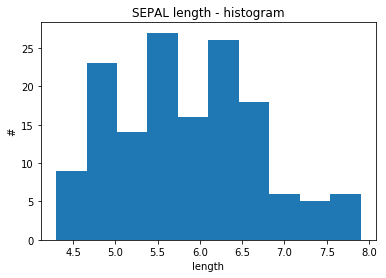

In [19]:
#histogram
plt.title("SEPAL length - histogram")
plt.xlabel("length")
plt.ylabel("#")
plt.hist(data['sepal_length'], bins=10)

## Exercício 7

Agora crie um único gráfico com histogramas para cada atributo (`petal_width`, `petal_length`, `sepal_width`, `sepal_length`) sobrepostos. 

Dicas para fazer isso com os métodos de plotagem do Pandas se encontram em [visualization guide](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html).

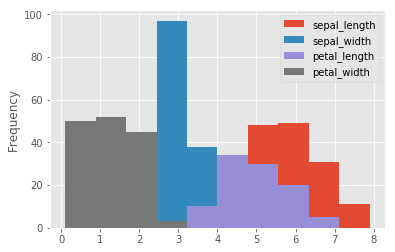

In [20]:
#histogram of all attr
import matplotlib
matplotlib.style.use('ggplot')

data.plot.hist(bins=10)

## Exercício 8

Usando Pandas, faça um boxplot de cada medida da pétala e sépala. Veja a documentação para algumas dicas [Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-box).

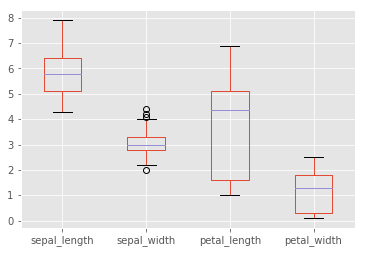

In [21]:
#boxplot of each attr
data.plot.box()

## Exercício 9

Agora faça um único boxplot onde os atributos estão separados no eixo-x e as espécies são coloridas por tons de cores diferentes.

*Dica:* veja a documentação para [Seaborn boxplots](http://seaborn.pydata.org/generated/seaborn.boxplot.html). 

Note que o Seaborn é bem exigente quanto ao formato dos dados--para esse plot funcionar, o dataframe de entrada precisa ser manipulado para que cada linha contenha um único ponto (uma espécie, um tipo de medida e um valor da medida). Veja o Pandas [stack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html) como uma dica.

Um exemplo desse formato para essa base:

|   | species | measurement  | size |
| - | ------- | ------------ | ---- |
| 0	| setosa  | sepal_length | 5.1  |
| 1	| setosa  | sepal_width  | 3.5  |

In [22]:
##EXERCISE 09 **TODO
#print(data.stack())
#sns.boxplot(x="measurement", y="species", hue="''", data=data.stack())

## Exercício 10

Faça um  [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html) com o Seaborn para examinar a correlação entre cada uma das medidas.

*Dica:* esse plot pode parecer complicado, mas é na verdade uma única linha de código. Esse é o poder de expressabilidade do Seaborn junto do Pandas.

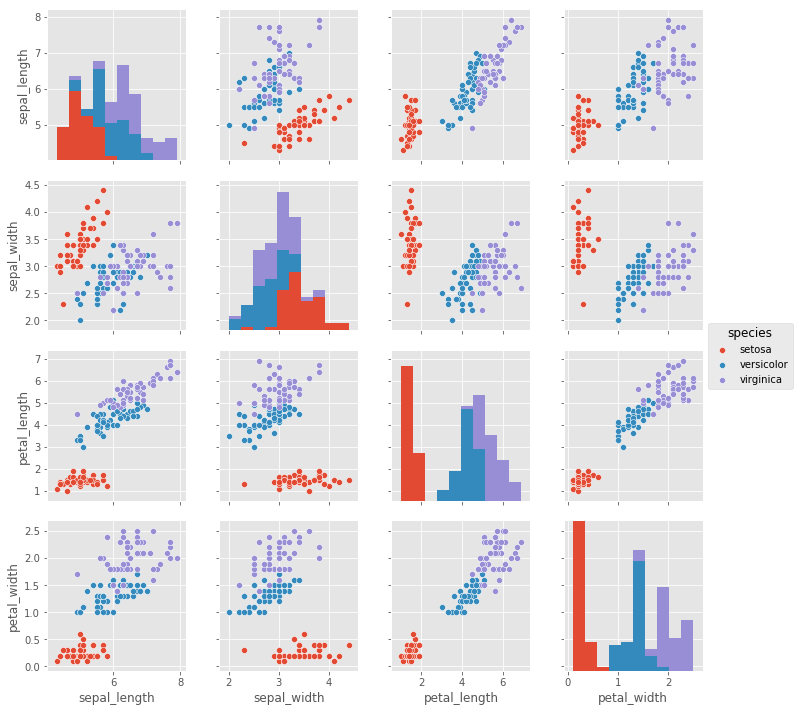

In [23]:
#pairplot
sns.pairplot(data, hue='species')